## How to move from exploratory analysis to reproducible science

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from jupyter_workflow.data import get_fremont_data

In [3]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


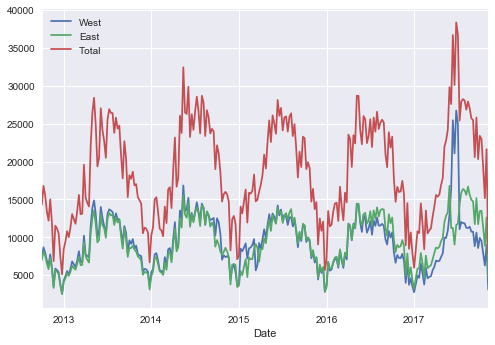

In [4]:

# pandas.DataFrame.resample: Convenience method for frequency conversion and resampling of time 
# series. Object must have a datetime-like index (DatetimeIndex, 
# PeriodIndex, or TimedeltaIndex), or pass datetime-like values to 
# the on or level keyword.

# shorten columns
data.resample("W").sum().plot();

In [5]:
# is there any annual growth or decay?

(0, 1059460.05)

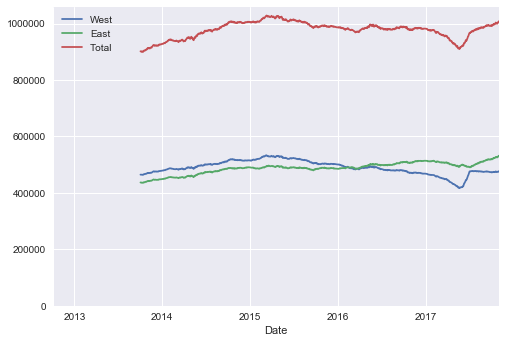

In [6]:
# rolling sum over 365 days of all the data

ax = data.resample("D").sum().rolling(365).sum().plot();
# this gives us an annual trend. Each point is the sum of rides from 
# the previous 365 days
ax.set_ylim(0, None) # the None part just means 'use current maximum'

# we can see total bike rides pretty much flatlines 2015-2017

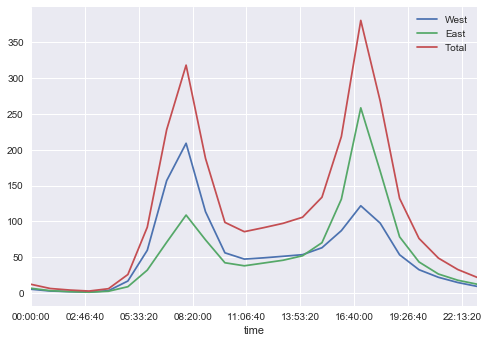

In [7]:
data.groupby(data.index.time).mean().plot(); 
# the average number of rides for each time period over all the days
# westside peaks in morning, eastbound peaks in afternoon 
# which makes sense for daily commutes

In [8]:
# this is basically long to wide
pivoted = data.pivot_table('Total', index = data.index.time, 
                          columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


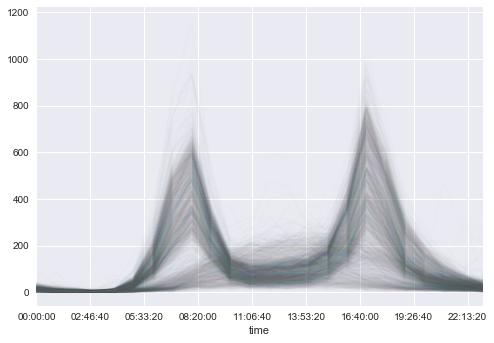

In [9]:
# we now have a line for each day of the year
pivoted.plot(legend=False, alpha = 0.01)
# we have a bunch of days with this commute pattern
# and a bunch of days are more unimodal. These are probs weekend days